In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLIndia/TRAIN.csv')
data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [ ]:
data.corr()['Class']

Index    -0.000619
V1       -0.096373
V2        0.086505
V3       -0.183220
V4        0.127422
V5       -0.089295
V6       -0.041521
V7       -0.180110
V8        0.015590
V9       -0.093588
V10      -0.207321
V11       0.147121
V12      -0.249538
V13      -0.004318
V14      -0.287015
V15      -0.003658
V16      -0.186621
V17      -0.312714
V18      -0.105902
V19       0.032968
V20       0.019624
V21       0.035185
V22       0.002137
V23      -0.002535
V24      -0.006572
V25       0.001242
V26       0.004224
V27       0.015708
V28       0.008279
Amount    0.004730
Class     1.000000
Name: Class, dtype: float64

In [ ]:
if data.duplicated().sum()>0:
  data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
def outlier(col):
  global data
  curr=len(data)
  prev=0
  vals=data['Class'].unique()
  for val in vals:
    q1=data[data['Class']==val][col].describe()[4]
    q3=data[data['Class']==val][col].describe()[6]
    iqr=q3-q1
    up=q3+1.5*iqr
    low=q1-1.5*iqr
    if up==low or q1==q3:
        pass
    else:
        data[data['Class']==val]=data[data['Class']==val][(data[col]>low)&(data[col]<up)]
        data.dropna(inplace=True)
        prev=curr
        curr=len(data)

In [ ]:
cols=data.columns[1:-1]
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
list(map(outlier,cols))
# list(map(outlier,cols))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Seri

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
data['Class'].value_counts()

0.0    109956
1.0       161
Name: Class, dtype: int64

Index        AxesSubplot(0.125,0.821923;0.227941x0.0580769)
V1        AxesSubplot(0.398529,0.821923;0.227941x0.0580769)
V2        AxesSubplot(0.672059,0.821923;0.227941x0.0580769)
V3           AxesSubplot(0.125,0.752231;0.227941x0.0580769)
V4        AxesSubplot(0.398529,0.752231;0.227941x0.0580769)
V5        AxesSubplot(0.672059,0.752231;0.227941x0.0580769)
V6           AxesSubplot(0.125,0.682538;0.227941x0.0580769)
V7        AxesSubplot(0.398529,0.682538;0.227941x0.0580769)
V8        AxesSubplot(0.672059,0.682538;0.227941x0.0580769)
V9           AxesSubplot(0.125,0.612846;0.227941x0.0580769)
V10       AxesSubplot(0.398529,0.612846;0.227941x0.0580769)
V11       AxesSubplot(0.672059,0.612846;0.227941x0.0580769)
V12          AxesSubplot(0.125,0.543154;0.227941x0.0580769)
V13       AxesSubplot(0.398529,0.543154;0.227941x0.0580769)
V14       AxesSubplot(0.672059,0.543154;0.227941x0.0580769)
V15          AxesSubplot(0.125,0.473462;0.227941x0.0580769)
V16       AxesSubplot(0.398529,0.473462;

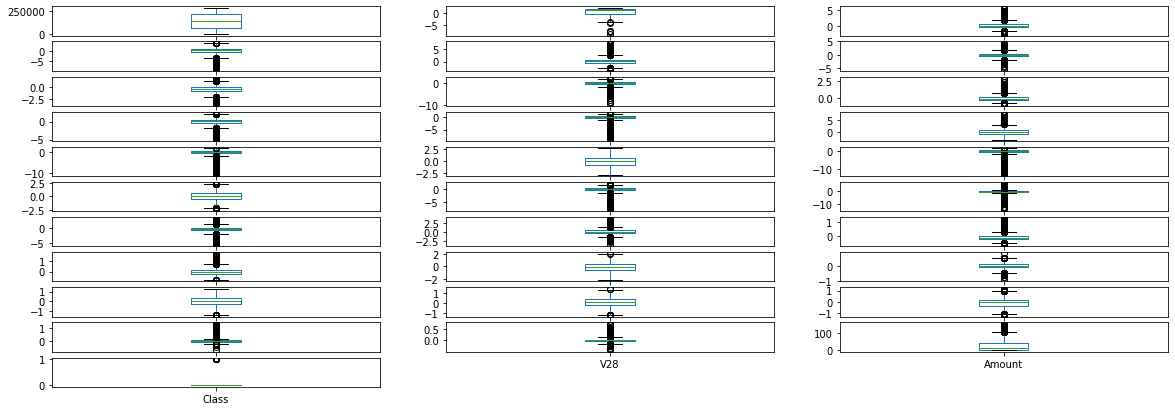

In [ ]:
data.plot(kind='box',subplots=True,figsize=(20,7),layout=(11,3))

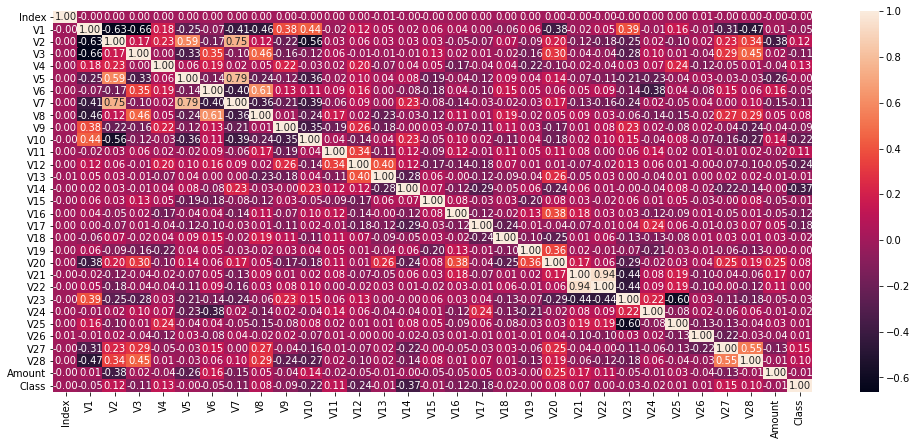

In [ ]:
plt.figure(figsize=(17,7))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
feature=SelectKBest(score_func=f_classif,k='all').fit(data.drop('Class',axis=1),data['Class'])
feature=pd.DataFrame(data=feature.scores_,index=data.drop('Class',axis=1).columns)
feature.sort_values(by=0,ascending=False)

,0
V14,17105.863047
V12,6996.732647
V10,5365.969950
V17,3851.314807
V27,2442.494021
V4,1856.345877
V16,1721.624461
V2,1587.638063
V3,1433.066543
V11,1419.627401


In [ ]:
feature[feature[0]>5].index

Index(['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V23', 'V24',
       'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
cols=feature[feature[0]>1000].index

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['Class'],random_state=42,test_size=0.2)

In [ ]:
data

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,1.0,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0.0
2,2.0,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0.0
5,5.0,1.426857,-0.534910,-0.007129,-0.638556,-0.537868,-0.388634,-0.377139,-0.218566,-0.603431,0.473522,-1.197674,-0.132571,1.112750,-0.646241,-0.608862,0.671544,0.361463,-1.594501,1.239811,0.168597,0.019992,0.174990,-0.236210,-0.385121,0.823957,-0.098765,0.007512,0.005304,29.05,0.0
7,7.0,1.281085,-0.646867,0.922173,-0.607454,-1.325681,-0.576396,-0.846559,-0.007180,-0.609686,0.544044,0.287683,-0.340593,0.243544,-0.272971,1.201487,1.003131,0.523546,-1.823568,-0.048116,0.083982,0.144724,0.312997,0.113063,0.412689,0.136760,-0.327389,0.039469,0.030014,31.00,0.0
11,11.0,2.001328,0.159701,-1.715483,0.398592,0.450024,-0.778837,0.207333,-0.163508,0.426969,-0.451025,1.051377,1.029094,0.177434,-0.761286,-0.354747,0.291747,0.294236,0.383344,0.360733,-0.168818,-0.285327,-0.677830,0.210373,-0.598021,-0.100294,-0.574360,0.003743,-0.035377,9.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284444,284444.0,1.065490,0.097966,0.488563,1.341608,-0.203395,0.038084,0.003114,0.109436,0.004323,0.031691,1.355821,1.322686,-0.178824,0.265813,-0.814047,-0.586276,0.083383,-0.553021,-0.162139,-0.136934,-0.022763,0.087578,-0.069344,0.247929,0.600330,-0.345418,0.032654,0.011867,30.20,0.0
284446,284446.0,1.329606,-1.826281,1.339878,-1.087799,-2.464182,0.215290,-2.019639,0.272093,-0.354928,1.232822,-1.791277,-1.756336,-1.174409,-0.926758,0.014514,-0.116246,0.602940,0.849580,-0.075784,-0.294795,-0.017903,0.369525,-0.140258,-0.134748,0.287086,0.053836,0.080954,0.039660,78.61,0.0
284447,284447.0,2.089168,0.113515,-2.183459,-0.167128,0.812206,-1.007439,0.683637,-0.389554,-0.159666,0.157880,1.230685,1.241409,0.402766,0.889733,-0.303111,-0.515743,-0.492707,-0.187035,0.319858,-0.173344,0.208364,0.709935,-0.015595,0.778602,0.428384,0.188246,-0.087822,-0.080937,3.85,0.0
284448,284448.0,1.087340,0.022521,0.344418,1.432990,-0.258194,-0.184923,0.066274,0.020336,0.408204,-0.119560,-0.673302,0.102728,-0.929781,0.235127,-0.000548,-0.680097,0.310821,-0.871196,-0.374973,-0.160863,-0.086977,-0.143376,-0.087343,0.074847,0.621353,-0.314352,0.027095,0.021236,48.17,0.0


In [ ]:
train_y.shape

(88093,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=10000,criterion='entropy',n_jobs=-1,max_depth=8)
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
print('Accuracy ',accuracy_score(predict,test_y)*100)
print('F1 Score ',f1_score(predict,test_y)*100)
print('CM\n',confusion_matrix(predict,test_y))
print('CR\n',classification_report(predict,test_y))

Accuracy  99.98183799491464
F1 Score  93.54838709677419
CM
 [[21991     4]
 [    0    29]]
CR
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21995
         1.0       0.88      1.00      0.94        29

    accuracy                           1.00     22024
   macro avg       0.94      1.00      0.97     22024
weighted avg       1.00      1.00      1.00     22024

